<a href="https://colab.research.google.com/github/SergioSarmientoRosales/ISSSD-2024/blob/main/Comparative_Study_on_Predicting_Dose_Equivalent_Rate_Using_Advanced_Machine_Learning_Techniques_and_Time_Series_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lasso-Model**



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Load the CSV file
uploaded = '/content/Ac.csv'

# Read the CSV
df = pd.read_csv(uploaded)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Select the first column (assuming the first column is index 0)
data = df_imputed.iloc[:, 0].values.reshape(-1, 1)

# Scale the data to the range [0, 1]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and test sets
#train_data = scaled_data[:6716]
#test_data = scaled_data[6716:]
# Split the data into training and test sets
train_data = scaled_data[:8332]
test_data = scaled_data[8332:]

# Function to create data sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define the sequence length
seq_length = 60

# Create training and test sequences
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Flatten x_train and x_test for the Lasso model
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Create the Lasso model with GridSearchCV
param_grid = {'lasso__alpha': np.logspace(-4, 4, 10)}

# Define the evaluation metric
scorer = make_scorer(r2_score)

# Create the pipeline
pipeline = make_pipeline(StandardScaler(), Lasso())

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Run hyperparameter search
grid_search.fit(x_train_flat, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test_flat)
r2 = r2_score(y_test, y_pred)
print(f'R² on the test set: {r2}')

# Inverse scale the predictions and actual values for comparison
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Create a DataFrame with measured and predicted values
results_df = pd.DataFrame({
    'Measured Data': y_test.flatten(),
    'Predicted Data': y_pred.flatten()
})

# Save the DataFrame to a CSV file
results_df.to_csv('/content/prediction_results.csv', index=False)

print("Data saved in prediction_results.csv")



R² en el conjunto de prueba: 0.3732923307181446
Datos guardados en resultados_predicciones.csv


### **KNN MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Load the CSV file
uploaded = '/content/Ac.csv'

# Read the CSV
df = pd.read_csv(uploaded)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Select the first column (assuming the first column is index 0)
data = df_imputed.iloc[:, 0].values.reshape(-1, 1)

# Scale the data to the range [0, 1]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and test sets
#train_data = scaled_data[:6716]
#test_data = scaled_data[6716:]
# Split the data into training and test sets
train_data = scaled_data[:8332]
test_data = scaled_data[8332:]

# Function to create data sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define the sequence length
seq_length = 60

# Create training and test sequences
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Flatten x_train and x_test for the KNN model
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Create the KNN model with GridSearchCV
param_grid = {'kneighborsregressor__n_neighbors': [3, 5, 7, 10, 15]}

# Define the evaluation metric
scorer = make_scorer(r2_score)

# Create the pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Run hyperparameter search
grid_search.fit(x_train_flat, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test_flat)
r2 = r2_score(y_test, y_pred)
print(f'R² on the test set: {r2}')

# Inverse scale the predictions and actual values for comparison
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Create a DataFrame with measured and predicted values
results_df = pd.DataFrame({
    'Measured Data': y_test.flatten(),
    'Predicted Data': y_pred.flatten()
})

# Save the DataFrame to a CSV file
results_df.to_csv('/content/prediction_results_knn.csv', index=False)

print("Data saved in prediction_results_knn.csv")


R² en el conjunto de prueba: 0.23845446836048823
Datos guardados en resultados_predicciones_knn.csv


### **RNN**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
uploaded = '/content/Ac.csv'

# Read the CSV
df = pd.read_csv(uploaded)

# Handle missing values
df.fillna(method='ffill', inplace=True)  # You can use 'bfill' or 'mean', etc.

# Select the first column (assuming the first column is index 0)
data = df.iloc[:, 0].values.reshape(-1, 1)

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Function to create data sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define the sequence length
seq_length = 60

# Create data sequences
x, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets using the same index as KNN and Lasso
split_index = 8332
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(x_test)

# Inverse scale the predictions and actual values for comparison
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

# Create a DataFrame with measured and predicted values
results_df = pd.DataFrame({
    'Measured Data': y_test.flatten(),
    'Predicted Data': y_pred.flatten()
})

# Save the DataFrame to a CSV file
results_df.to_csv('/content/prediction_results_rnn.csv', index=False)

print("Data saved in prediction_results_rnn.csv")





<ipython-input-9-b8ee287496a2>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # O puedes usar 'bfill' o 'mean', etc.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0094 - val_loss: 0.0012
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0018 - val_loss: 9.6604e-04
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0017 - val_loss: 8.5951e-04
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0017 - val_loss: 9.5352e-04
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0018 - val_loss: 9.3218e-04
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0017 - val_loss: 7.9269e-04
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0014 - val_loss: 7.8189e-04
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0012 - val_loss: 8.1977e-04
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0014 - val_loss: 7.5782e-04
E

### **Graphs**

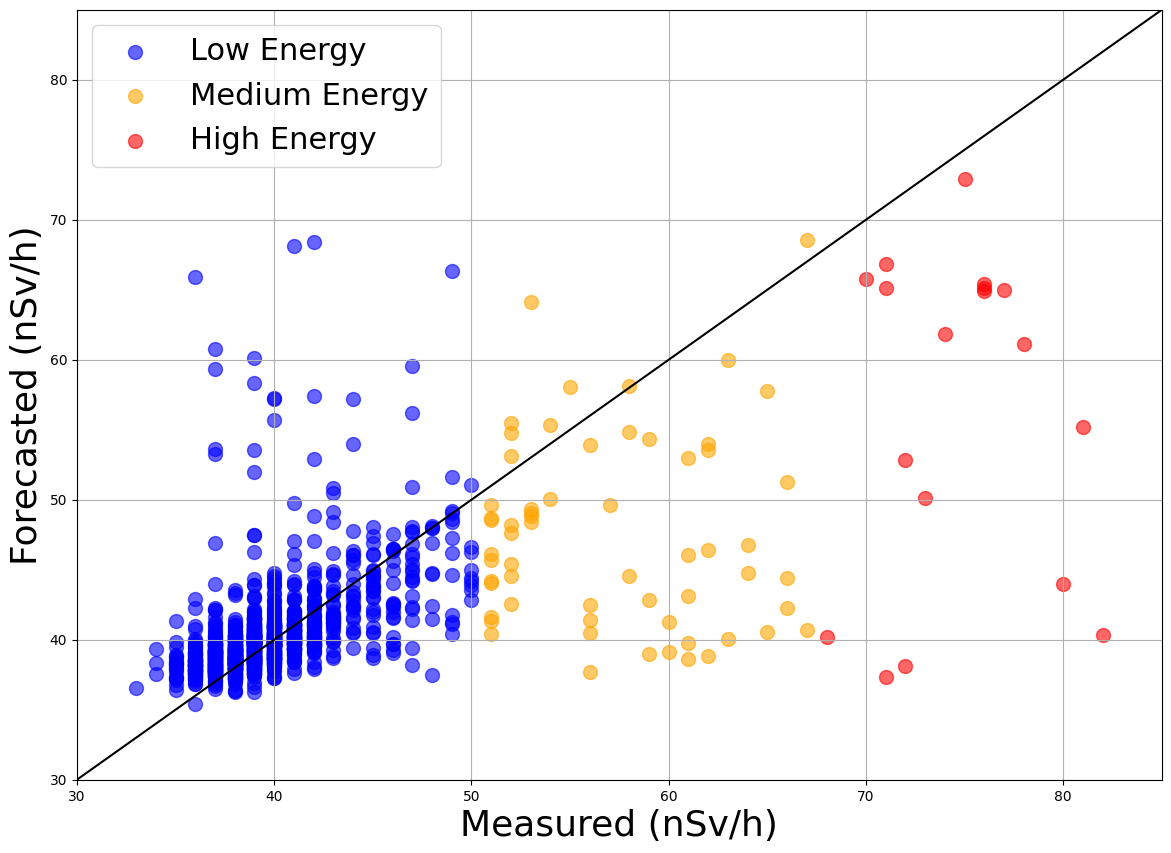

Low dataset Correlation Coefficient (r): 0.5111
Low dataset MSE: 8.9002
Medium dataset Correlation Coefficient (r): 0.0039
Medium dataset MSE: 164.6211
High dataset Correlation Coefficient (r): 0.0236
High dataset MSE: 499.3722
General Correlation Coefficient (r): 0.6330
General MSE: 20.8555


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

# Read the CSV file
file_path = '/content/resultados_predicciones_rnn.csv'  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Ensure the file has at least two columns
if df.shape[1] < 2:
    raise ValueError("The CSV file must have at least two columns.")

# Normalize the first column
scaler = MinMaxScaler()
df['Normalized'] = scaler.fit_transform(df.iloc[:, [0]])

# Clean the data: remove rows with NaN or inf
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Create three datasets based on normalized values
low_dataset = df[df['Normalized'] < 0.33]
medium_dataset = df[(df['Normalized'] >= 0.33) & (df['Normalized'] <= 0.66)]
high_dataset = df[df['Normalized'] > 0.66]

# Calculate correlation coefficient and MSE for each dataset
def calculate_correlation(x, y):
    return pearsonr(x, y)[0]

def calculate_mse(x, y):
    return mean_squared_error(x, y)

# Calculate correlation coefficient and MSE for each subset
low_r = calculate_correlation(low_dataset.iloc[:, 0], low_dataset.iloc[:, 1])
medium_r = calculate_correlation(medium_dataset.iloc[:, 0], medium_dataset.iloc[:, 1])
high_r = calculate_correlation(high_dataset.iloc[:, 0], high_dataset.iloc[:, 1])

low_mse = calculate_mse(low_dataset.iloc[:, 0], low_dataset.iloc[:, 1])
medium_mse = calculate_mse(medium_dataset.iloc[:, 0], medium_dataset.iloc[:, 1])
high_mse = calculate_mse(high_dataset.iloc[:, 0], high_dataset.iloc[:, 1])

# Calculate overall correlation coefficient and MSE
general_r = calculate_correlation(df.iloc[:, 0], df.iloc[:, 1])
general_mse = calculate_mse(df.iloc[:, 0], df.iloc[:, 1])

# Create the figure and axis with increased size
plt.figure(figsize=(14, 10))

# Plot the data with larger point sizes
plt.scatter(low_dataset.iloc[:, 0], low_dataset.iloc[:, 1], color='blue', alpha=0.6, label='Low Energy', s=100)
plt.scatter(medium_dataset.iloc[:, 0], medium_dataset.iloc[:, 1], color='orange', alpha=0.6, label='Medium Energy', s=100)
plt.scatter(high_dataset.iloc[:, 0], high_dataset.iloc[:, 1], color='red', alpha=0.6, label='High Energy', s=100)

# Add the 1:1 line
plt.plot([30, 85], [30, 85], color='black', linestyle='-')

# Set axis limits
plt.xlim(30, 85)
plt.ylim(30, 85)

# Labels and title with increased font size
plt.xlabel('Measured (nSv/h)', fontsize=26)
plt.ylabel('Forecasted (nSv/h)', fontsize=26)
plt.grid(True)
plt.legend(fontsize=22)

# Show the plot
plt.show()

# Print the results
print(f'Low dataset Correlation Coefficient (r): {low_r:.4f}')
print(f'Low dataset MSE: {low_mse:.4f}')
print(f'Medium dataset Correlation Coefficient (r): {medium_r:.4f}')
print(f'Medium dataset MSE: {medium_mse:.4f}')
print(f'High dataset Correlation Coefficient (r): {high_r:.4f}')
print(f'High dataset MSE: {high_mse:.4f}')
print(f'General Correlation Coefficient (r): {general_r:.4f}')
print(f'General MSE: {general_mse:.4f}')




In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/archivo_limpio2.csv')  # Load the CSV file into a DataFrame

# Normalize the values in 'columna1' and store them in 'columna2'
df['columna2'] = (df['Dose Equivalent Rate(nSv/h)'] - df['Dose Equivalent Rate(nSv/h)'].min()) / (df['Dose Equivalent Rate(nSv/h)'].max() - df['Dose Equivalent Rate(nSv/h)'].min())

# Filter the values in 'columna2' into three categories
low_energy = df[df['columna2'] < 0.33]
medium_energy = df[(df['columna2'] >= 0.33) & (df['columna2'] <= 0.66)]
high_energy = df[df['columna2'] > 0.66]

# Optionally, save the filtered data to new CSV files
low_energy.to_csv('low_energy.csv', index=False)
medium_energy.to_csv('medium_energy.csv', index=False)
high_energy.to_csv('high_energy.csv', index=False)

